In [1]:
import pandas as pd
import os
import requests as req
import json
import numpy as np
import datetime

from matplotlib import style
import matplotlib
%matplotlib inline
style.use('ggplot')

#  new class - marco.pritoni@gmail.com
from PI_downloader import *

In [2]:
# instantiate the class 
p=PI_stream_downloader()

https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ/interpolated
<Response [200]>
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ/interpolated
<Response [200]>


2017-01-25 08:00:00     974.775940
2017-01-25 09:00:00     964.301514
2017-01-25 10:00:00     963.228149
2017-01-25 11:00:00     930.155396
2017-01-25 12:00:00     907.761230
2017-01-25 13:00:00     930.307373
2017-01-25 14:00:00     906.729919
2017-01-25 15:00:00     930.349670
2017-01-25 16:00:00    1014.640320
2017-01-25 17:00:00    1193.954712
2017-01-25 18:00:00    1158.859863
2017-01-25 19:00:00    1170.304199
2017-01-25 20:00:00    1204.081299
2017-01-25 21:00:00    1164.263062
2017-01-25 22:00:00    1176.909424
2017-01-25 23:00:00    1161.217285
2017-01-26 00:00:00    1285.113647
2017-01-26 01:00:00    1248.347656
2017-01-26 02:00:00    1117.441406
2017-01-26 03:00:00    1167.634888
2017-01-26 04:00:00    1051.542236
2017-01-26 05:00:00    1103.198364
2017-01-26 06:00:00    1056.396606
2017-01-26 07:00:00     944.217896
2017-01-26 08:00:00     942.028442
Name: A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UIC

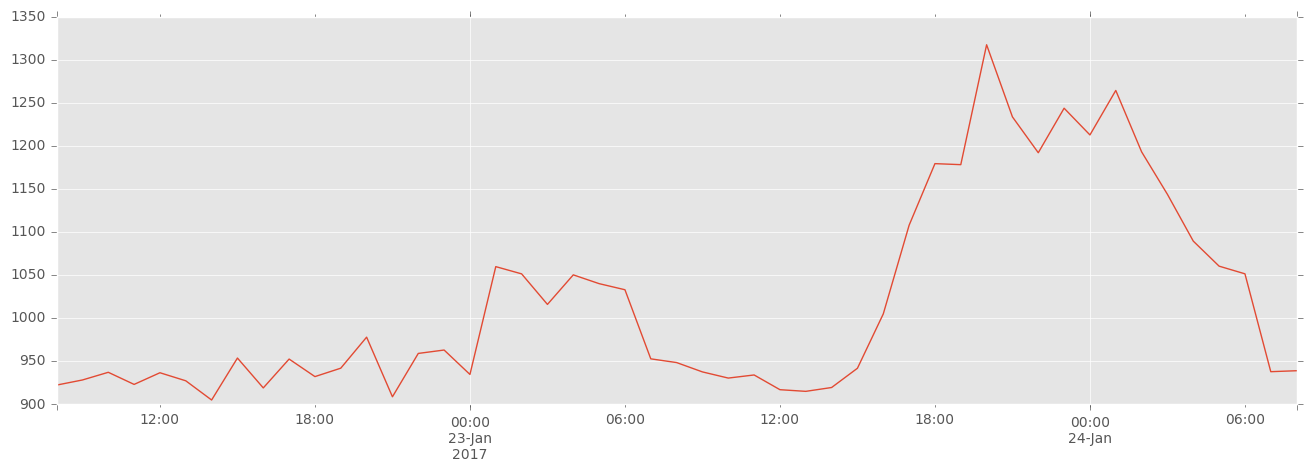

In [4]:
## method get_stream()
## get the stream by WebID
## input: Web ID
## 
## output: pandas Series/dictionary
##
## arguments: 
## Web_ID=None : - the unique identifier of the time series 
## _start="y" : - start date, default yesterday "y"; can use different formats as "YYYY-MM-DD";
## _end="t" : - end date, default yesterday "t"; can use different formats as "YYYY-MM-DD";        
## _calculation="interpolated": can use "recorded" to get raw data and summary to get summary data (tot, mean, sd);
## note: summary data is not a time series, but a dictionary
## _interval="1h": interpolation interval, used only with interpolated; default 1 hour
## _controller=None : not used at the moment; needed for future extensions 
#  _sumType=None : used if calculation is "summary", can use All, Total, default Total
#  _label=None : not used at the moment; needed for future extensions 

Web_ID="A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ"

# plot and show results
p.get_stream(Web_ID,_start="2017-01-22", _end="2017-01-24").plot(figsize=(16,5))
p.get_stream(Web_ID)

In [15]:
## example using the _calculation="summary"
Web_ID="A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ"

# plot and show results
p.get_stream(Web_ID,_start="2017-01-22", _end="2017-01-24", _calculation="summary",_sumType="All")

https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ/summary
<Response [200]>


{u'Average': 1021.9911231408296,
 u'Count': 172800.0,
 u'Maximum': 1381.5174560546875,
 u'Minimum': 878.1466064453125,
 u'PercentGood': 100.0,
 u'PopulationStdDev': 112.73412006484338,
 u'Range': 503.370849609375,
 u'StdDev': 112.73412006484338,
 u'Total': 2043.9822462816592}

P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/interpolated
<Response [200]>
P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q
https://ucd-pi-iis.ou.ad3.ucdavis.edu/piwebapi/streams/P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q/interpolated
<Response [200]>


2017-01-25 08:00:00    70.250000
2017-01-25 09:00:00    70.250000
2017-01-25 10:00:00    70.390595
2017-01-25 11:00:00    70.250000
2017-01-25 12:00:00    70.500000
2017-01-25 13:00:00    70.000000
2017-01-25 14:00:00    70.000000
2017-01-25 15:00:00    70.000000
2017-01-25 16:00:00    69.750000
2017-01-25 17:00:00    70.000000
2017-01-25 18:00:00    70.030620
2017-01-25 19:00:00    70.000000
2017-01-25 20:00:00    69.750000
2017-01-25 21:00:00    69.750000
2017-01-25 22:00:00    69.500000
2017-01-25 23:00:00    69.790690
2017-01-26 00:00:00    69.992060
2017-01-26 01:00:00    70.076930
2017-01-26 02:00:00    70.230290
2017-01-26 03:00:00    70.500000
2017-01-26 04:00:00    70.500000
2017-01-26 05:00:00    70.000000
2017-01-26 06:00:00    69.750000
2017-01-26 07:00:00    69.750000
2017-01-26 08:00:00    69.750000
Name: P09KoOKByvc0-uxyvoTV1UfQcGQAAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTM6Uk9PTS5URU1Q, dtype: float64

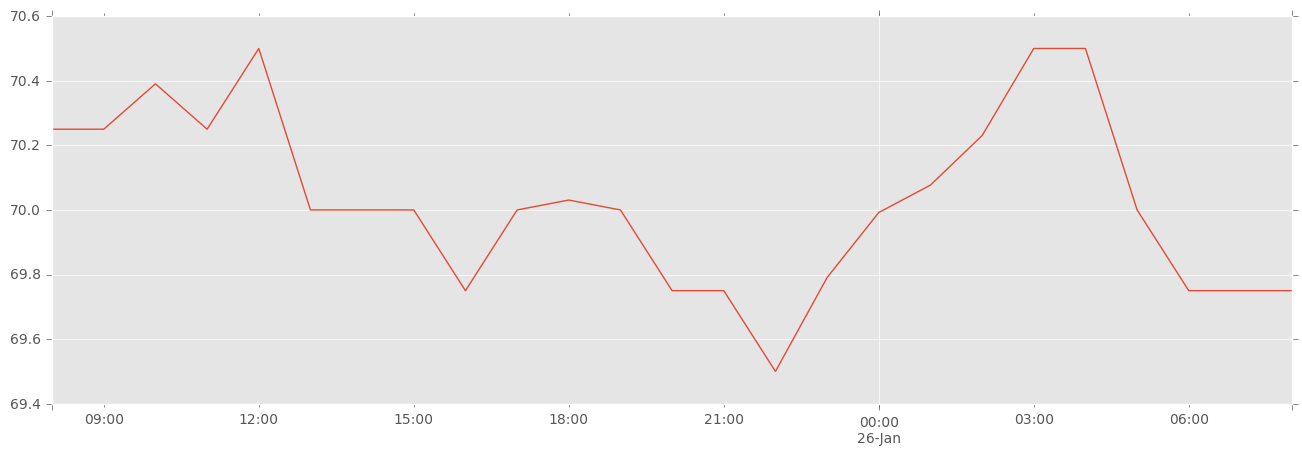

In [5]:
## get_stream_by_point()
##
## getting the data by WebIDs is not pratical
## we want to get the data by data point name 
## 
## input: point name; can use *  
##
## output: pandas Series/dictionary
##
##
## arguments: 
## point_name : - the name is unique in each database 
## _start="y" : - start date, default yesterday "y"; can use different formats as "YYYY-MM-DD";
## _end="t" : - end date, default yesterday "t"; can use different formats as "YYYY-MM-DD";        
## _calculation="interpolated": can use "recorded" to get raw data and summary to get summary data (tot, mean, sd);
## note: summary data is not a time series, but a dictionary
## _interval="1h": interpolation interval, used only with interpolated; default 1 hour
## _controller=None : not used at the moment; needed for future extensions 
#  _sumType=None : used if calculation is "summary", can use All, Total, default Total
#  _label=None : not used at the moment; needed for future extensions 
# dataserver : there can be more databases in a PI environment; default "s09KoOKByvc0-uxyvoTV1UfQVVRJTC1QSS1Q"

point_name="Ghausi.AHU01.RM1113:ROOM.TEMP"

p.get_stream_by_point(point_name).plot(figsize=(16,5))
p.get_stream_by_point(point_name)

In [6]:
## search_by_point()
## method to search for data points names using * 
##
## output: list of point names and dictionary of point name: WebIDs

l, d = p.search_by_point("GHAUSI*AHU01*RM1113*")

In [7]:
l

[u'Ghausi.AHU01.RM1113.ACH',
 u'Ghausi.AHU01.RM1113.Canopy Hood High Daily Duration',
 u'Ghausi.AHU01.RM1113.Canopy Hood High Monthly Duration',
 u'Ghausi.AHU01.RM1113.CFM CURRENT TO STPT RATIO',
 u'Ghausi.AHU01.RM1113.CFM CURRENT TO STPT RATIO%',
 u'Ghausi.AHU01.RM1113.CONTROL AIRFLOW MAXIMUM',
 u'Ghausi.AHU01.RM1113.CONTROL AIRFLOW MINIMUM',
 u'Ghausi.AHU01.RM1113.Cooling Deficiency',
 u'Ghausi.AHU01.RM1113.Cooling Delivered',
 u'Ghausi.AHU01.RM1113.Cooling Driving Lab',
 u'Ghausi.AHU01.RM1113.Reheat Deficiency',
 u'Ghausi.AHU01.RM1113.Reheat Delivered',
 u'Ghausi.AHU01.RM1113.Room Thermostat Temperature Offset',
 u'Ghausi.AHU01.RM1113.SMART TEMP GAUGE',
 u'Ghausi.AHU01.RM1113:AIRFLOWDIFF',
 u'Ghausi.AHU01.RM1113:CTRL.STPT',
 u'Ghausi.AHU01.RM1113:EX.CONST.AIRFLOW',
 u'Ghausi.AHU01.RM1113:GEN.EX.AIRFLOW',
 u'Ghausi.AHU01.RM1113:GEN.EX.AIRFLOW.STPT',
 u'Ghausi.AHU01.RM1113:GEN.EX.OCC.AIRFLOWMAX.STPT',
 u'Ghausi.AHU01.RM1113:GEN.EX.OCC.AIRFLOWMIN.STPT',
 u'Ghausi.AHU01.RM1113:GEN.EX.UN

In [45]:
d

{u'Ghausi.AHU01.RM1113.ACH': u'P09KoOKByvc0-uxyvoTV1UfQQ6QCAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQUNI',
 u'Ghausi.AHU01.RM1113.CFM CURRENT TO STPT RATIO': u'P09KoOKByvc0-uxyvoTV1UfQ-qACAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQ0ZNIENVUlJFTlQgVE8gU1RQVCBSQVRJTw',
 u'Ghausi.AHU01.RM1113.CFM CURRENT TO STPT RATIO%': u'P09KoOKByvc0-uxyvoTV1UfQMaICAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQ0ZNIENVUlJFTlQgVE8gU1RQVCBSQVRJTyU',
 u'Ghausi.AHU01.RM1113.CONTROL AIRFLOW MAXIMUM': u'P09KoOKByvc0-uxyvoTV1UfQbZ8CAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQ09OVFJPTCBBSVJGTE9XIE1BWElNVU0',
 u'Ghausi.AHU01.RM1113.CONTROL AIRFLOW MINIMUM': u'P09KoOKByvc0-uxyvoTV1UfQbp8CAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQ09OVFJPTCBBSVJGTE9XIE1JTklNVU0',
 u'Ghausi.AHU01.RM1113.Canopy Hood High Daily Duration': u'P09KoOKByvc0-uxyvoTV1UfQcoEBAAVVRJTC1QSS1QXEdIQVVTSS5BSFUwMS5STTExMTMuQ0FOT1BZIEhPT0QgSElHSCBEQUlMWSBEVVJBVElPTg',
 u'Ghausi.AHU01.RM1113.Canopy Hood High Monthly Duration': u'P09KoOKByvc0-uxyvoTV1UfQC